### Note: this tutorial needs updating and has not been recently tested for basic functionality: use at own risk

In [1]:
from __future__ import print_function

In [2]:
import os
import sys
import time
import json

import pygsti

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load example quantities from files
gs_target = pygsti.io.load_gateset("tutorial_files/Example_Gateset.txt")
gs_mc2gst = pygsti.io.load_gateset("tutorial_files/Example_MC2GST_Gateset.txt")

ds = pygsti.io.load_dataset("tutorial_files/Example_Dataset.txt", cache=True)

fiducials = pygsti.io.load_gatestring_list("tutorial_files/Example_FiducialList.txt")
germs = pygsti.io.load_gatestring_list("tutorial_files/Example_GermsList.txt")
maxLengths = json.load(open("tutorial_files/Example_maxLengths.json","r"))

specs = pygsti.construction.build_spam_specs(fiducials)

Loading from cache file: tutorial_files/Example_Dataset.txt.cache


## Parametric Bootstrapping
Here we do parametric bootstrapping, as indicated by the 'parametric' argument below.
The output is eventually stored in the "mean" and "std" GateSets, which hold the mean and standard deviation values of the set of bootstrapped gatesets (after gauge optimization).  It is this latter "standard deviation Gateset"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.


In [4]:
#The number of simulated datasets & gatesets made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numGatesets=10

param_boot_gatesets = pygsti.drivers.make_bootstrap_gatesets(
                        numGatesets, ds, 'parametric', fiducials, fiducials, germs, maxLengths,
                        inputGateSet=gs_mc2gst, startSeed=0, returnData=False,
                        verbosity=2)

Creating DataSets: 
0 Generating parametric dataset.
1 Generating parametric dataset.
2 Generating parametric dataset.
3 Generating parametric dataset.
4 Generating parametric dataset.
5 Generating parametric dataset.
6 Generating parametric dataset.
7 Generating parametric dataset.
8 Generating parametric dataset.
9 Generating parametric dataset.
Creating GateSets: 
Running MLGST Iteration 0 
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.24430657954
  1.19541285105
  0.972320887627
  0.924565187278
  0.051646837852
  0.0235729617374
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.246313691
  1.17235194083
  0.953112718624
  0.943760994228
  3.49602251407e-16
  1.72707620951e-16
  
--- Iterative MLGST: Iter 01 of 10  92 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Created evaluation tree with 1 subtrees.  Will divide 1 procs into 1 (subtree-processing)
   groups of ~1 procs each, to distribute over 56 params (taken as 1 par

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 0.0001


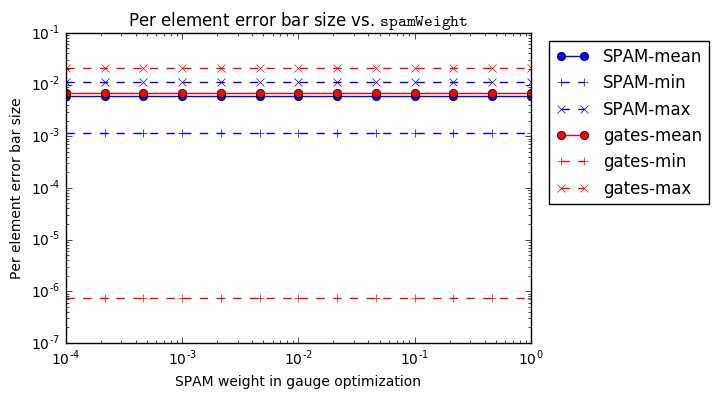

In [5]:
gauge_opt_pboot_gatesets = pygsti.drivers.gauge_optimize_gs_list(param_boot_gatesets, gs_mc2gst,
                                                                 plot=True)

In [6]:
pboot_mean = pygsti.drivers.to_mean_gateset(gauge_opt_pboot_gatesets, gs_mc2gst)
pboot_std  = pygsti.drivers.to_std_gateset(gauge_opt_pboot_gatesets, gs_mc2gst)

#Summary of the error bars
print("Parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:") 
print(pboot_std['rho0'], end='\n\n')
print("Error in E vec:")
print(pboot_std['E0'], end='\n\n')
print("Error in Gi:")
print(pboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(pboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(pboot_std['Gy'])

Parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
Fully Parameterized spam vector with length 4
   0
   0
 0.01
   0


Error in E vec:
Fully Parameterized spam vector with length 4
   0
   0
   0
   0


Error in Gi:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
   0   0 0.01 0.02
 0.02 0.02   0   0
 0.01 0.02   0   0


Error in Gy:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
 0.01 0.01 0.02 0.02
   0 0.02   0 0.02
   0 0.02 0.02 0.01



##Non-parametric Bootstrapping
Here we do non-parametric bootstrapping, as indicated by the 'nonparametric' argument below.
The output is again eventually stored in the "mean" and "std" GateSets, which hold the mean and standard deviation values of the set of bootstrapped gatesets (after gauge optimization).  It is this latter "standard deviation Gateset"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.

(Technical note: ddof = 1 is by default used when computing the standard deviation -- see numpy.std -- meaning that we are computing a standard deviation of the sample, not of the population.)

In [7]:
#The number of simulated datasets & gatesets made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numGatesets=10

nonparam_boot_gatesets = pygsti.drivers.make_bootstrap_gatesets(
                          numGatesets, ds, 'nonparametric', fiducials, fiducials, germs, maxLengths,
                          targetGateSet=gs_mc2gst, startSeed=0, returnData=False, verbosity=2)

Creating DataSets: 
0 Generating non-parametric dataset.
1 Generating non-parametric dataset.
2 Generating non-parametric dataset.
3 Generating non-parametric dataset.
4 Generating non-parametric dataset.
5 Generating non-parametric dataset.
6 Generating non-parametric dataset.
7 Generating non-parametric dataset.
8 Generating non-parametric dataset.
9 Generating non-parametric dataset.
Creating GateSets: 
Running MLGST Iteration 0 
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.24550397209
  1.20335083144
  0.975668667345
  0.917454523185
  0.0670503056945
  0.019102495855
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.246313691
  1.17235194083
  0.953112718624
  0.943760994228
  3.49602251407e-16
  1.72707620951e-16
  
--- Iterative MLGST: Iter 01 of 10  92 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Created evaluation tree with 1 subtrees.  Will divide 1 procs into 1 (subtree-processing)
   groups of ~1 procs each, to d

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 0.0001


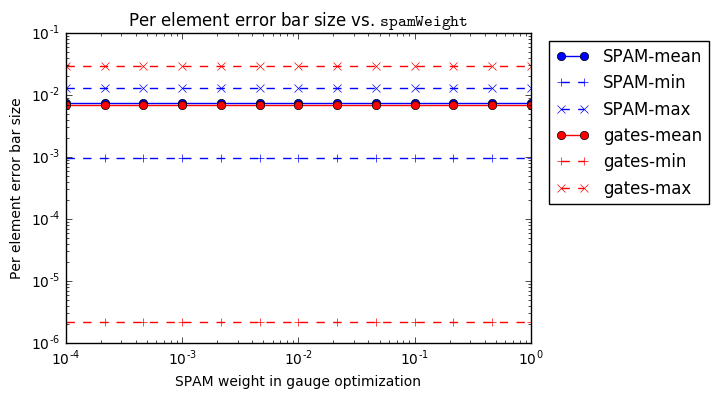

In [8]:
gauge_opt_npboot_gatesets = pygsti.drivers.gauge_optimize_gs_list(nonparam_boot_gatesets, gs_mc2gst,
                                                                 plot=True)

In [9]:
npboot_mean = pygsti.drivers.to_mean_gateset(gauge_opt_npboot_gatesets, gs_mc2gst)
npboot_std  = pygsti.drivers.to_std_gateset(gauge_opt_npboot_gatesets, gs_mc2gst)

#Summary of the error bars
print("Non-parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:")
print(npboot_std['rho0'], end='\n\n')
print("Error in E vec:")
print(npboot_std['E0'], end='\n\n')
print("Error in Gi:")
print(npboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(npboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(npboot_std['Gy'])

Non-parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
Fully Parameterized spam vector with length 4
   0
   0
 0.01
   0


Error in E vec:
Fully Parameterized spam vector with length 4
   0
   0
 0.01
   0


Error in Gi:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
   0   0 0.01 0.01
 0.01 0.03 0.01   0
   0 0.02   0   0


Error in Gy:
Fully Parameterized gate with shape (4, 4)
   0   0   0   0
 0.01 0.01 0.03 0.01
   0 0.03   0 0.03
 0.01 0.01 0.02 0.01



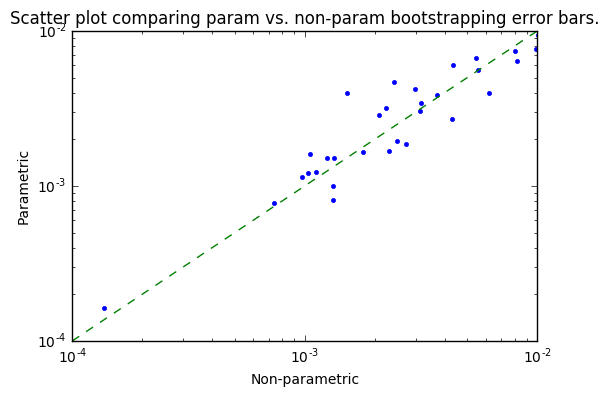

In [10]:
loglog(npboot_std.to_vector(),pboot_std.to_vector(),'.')
loglog(np.logspace(-4,-2,10),np.logspace(-4,-2,10),'--')
xlabel('Non-parametric')
ylabel('Parametric')
xlim((1e-4,1e-2)); ylim((1e-4,1e-2))
title('Scatter plot comparing param vs. non-param bootstrapping error bars.')